In [ ]:
!pip install keras
!pip install scikeras
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#ML
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, classification_report, roc_curve, auc, cohen_kappa_score, matthews_corrcoef,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

#DL
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model

#from tensorflow.keras.layers import LSTM, Dense

import keras
from keras.layers import Dense, Input
#from keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier

from keras.models import Sequential, load_model
from keras.layers import Dense

import shap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/Student-Employability-Datasets.csv")
df

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable
2978,Student 2997,3,4,4,4,4,4,4,5,Employable
2979,Student 2998,4,5,4,5,4,4,4,5,Employable
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable


In [ ]:
# Local use not in Colab
#df = pd.read_csv("Student-Employability-Datasets.csv")
#df

# Visualize and explore the dataset

## General exploration of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [ ]:
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#Checks how balanced the class from employable and LessEmployable are.
df['CLASS'].describe()

,CLASS
count,2982
unique,2
top,Employable
freq,1729


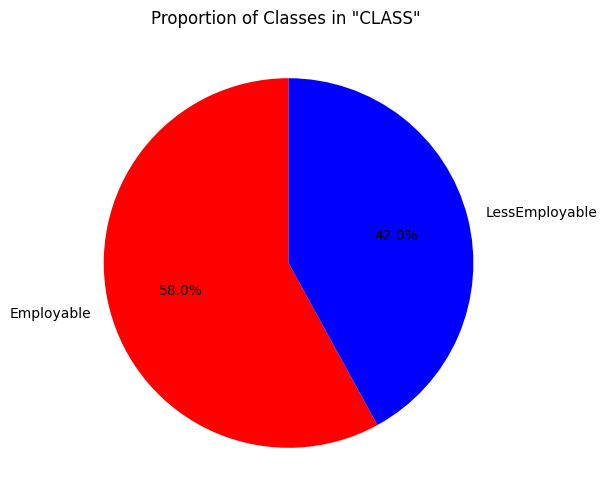

In [ ]:
plt.figure(figsize = (6,6))
plt.pie((df['CLASS'].value_counts()/2982), labels=['Employable','LessEmployable'],
       autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
plt.title('Proportion of Classes in "CLASS" ')
plt.show()
#Since it is somewhat balanced the classes, there's no need for doing undersampling or oversampling.

In [ ]:
graph_df=df.drop(columns = 'Name of Student')

custom_labels = ['Employable','LessEmployable']
encoder = LabelEncoder()
encoder.classes_=custom_labels
graph_df['CLASS'] = encoder.fit_transform(graph_df['CLASS'])
graph_df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664,0.420188
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845,0.493672
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


## Bar plots to visualize


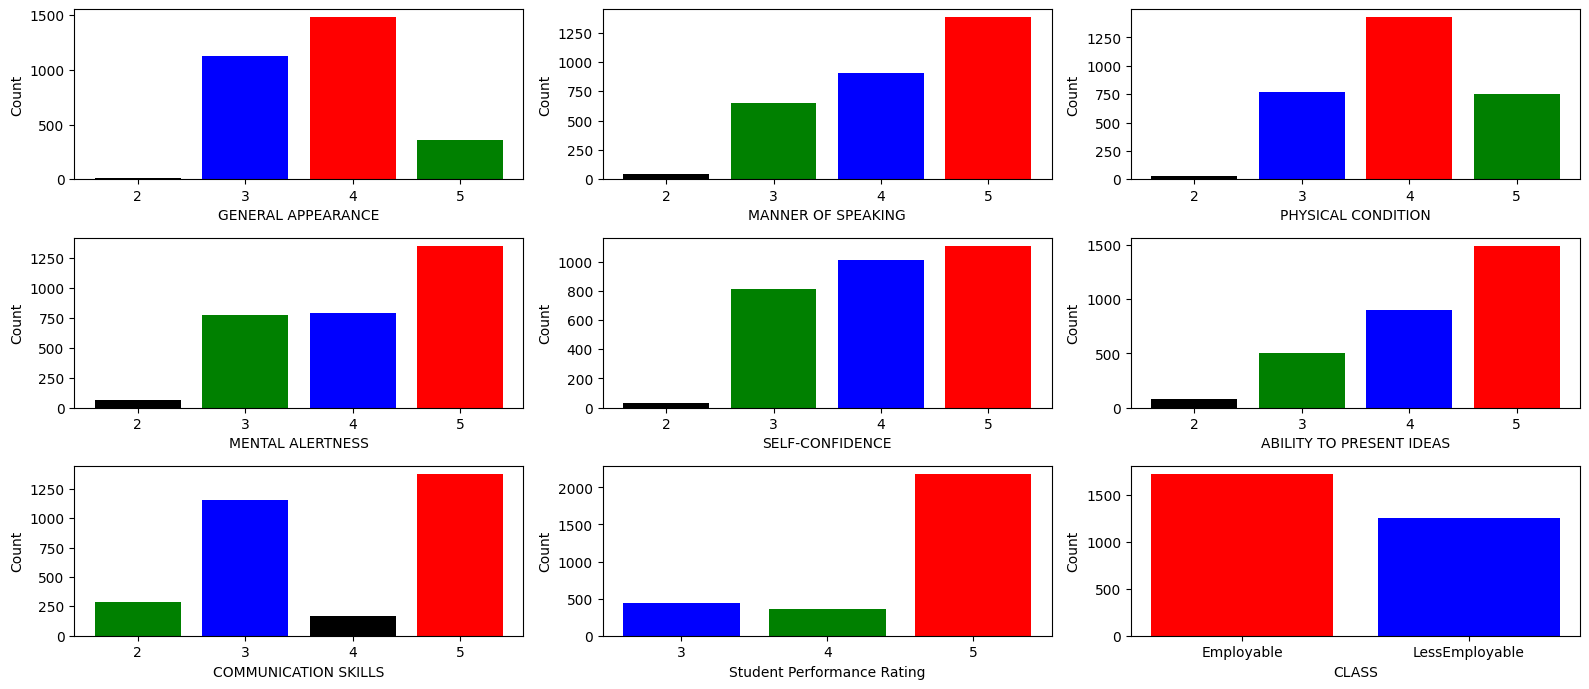

In [ ]:
graph_df=df.drop(columns = 'Name of Student')
fig, axes = plt.subplots(3, 3, figsize=(16, 7))
for i, column in enumerate(graph_df.columns):
    row = i // 3
    col = i % 3
    axes[row, col].bar(graph_df[column].unique(), graph_df[column].value_counts(), color=['r', 'blue', 'green', 'black'])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xticks(graph_df[column].unique())
plt.tight_layout()
plt.show()

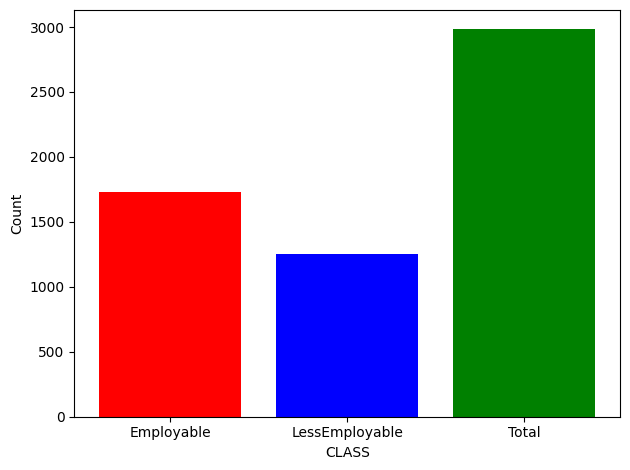

In [ ]:
fig = plt.plot(figsize = (10,10))
sum_of_first_two_bars = graph_df['CLASS'].value_counts().iloc[:2].sum()

plt.bar(graph_df['CLASS'].unique(), graph_df['CLASS'].value_counts(), color = ['red', 'blue'])
plt.bar(len(graph_df['CLASS'].unique()), sum_of_first_two_bars, color='green')
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Employable', 'LessEmployable' ,'Total'])
plt.tight_layout()
plt.show()

## Correlation Matrix of the dataset using encoding to add the variable target CLASS


<Axes: >

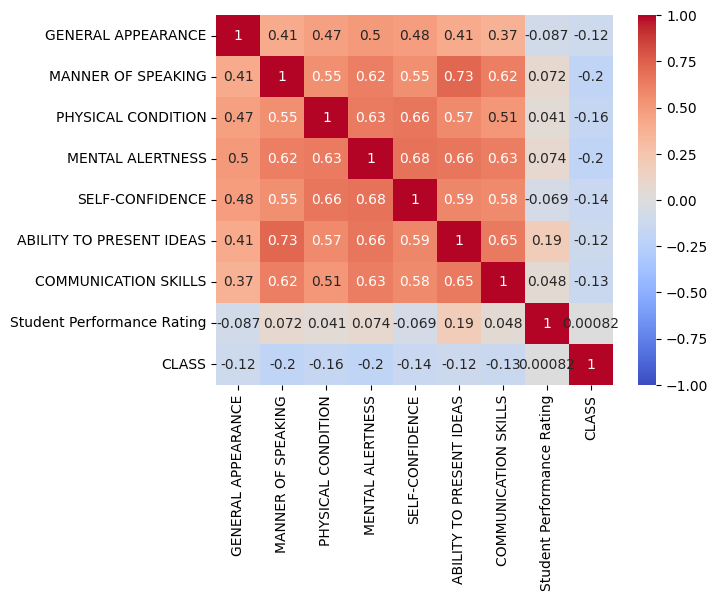

In [ ]:
custom_labels = ['Employable','LessEmployable']
encoder = LabelEncoder()
encoder.classes_=custom_labels
graph_df['CLASS'] = encoder.fit_transform(graph_df['CLASS'])
sns.heatmap(graph_df.corr(),annot=True, cmap="coolwarm", vmin=-1, vmax = 1)

## Scatter Matrix


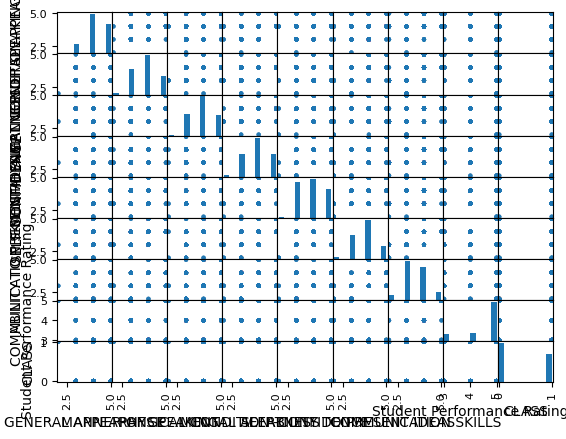

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(graph_df, alpha=0.2)
plt.show()

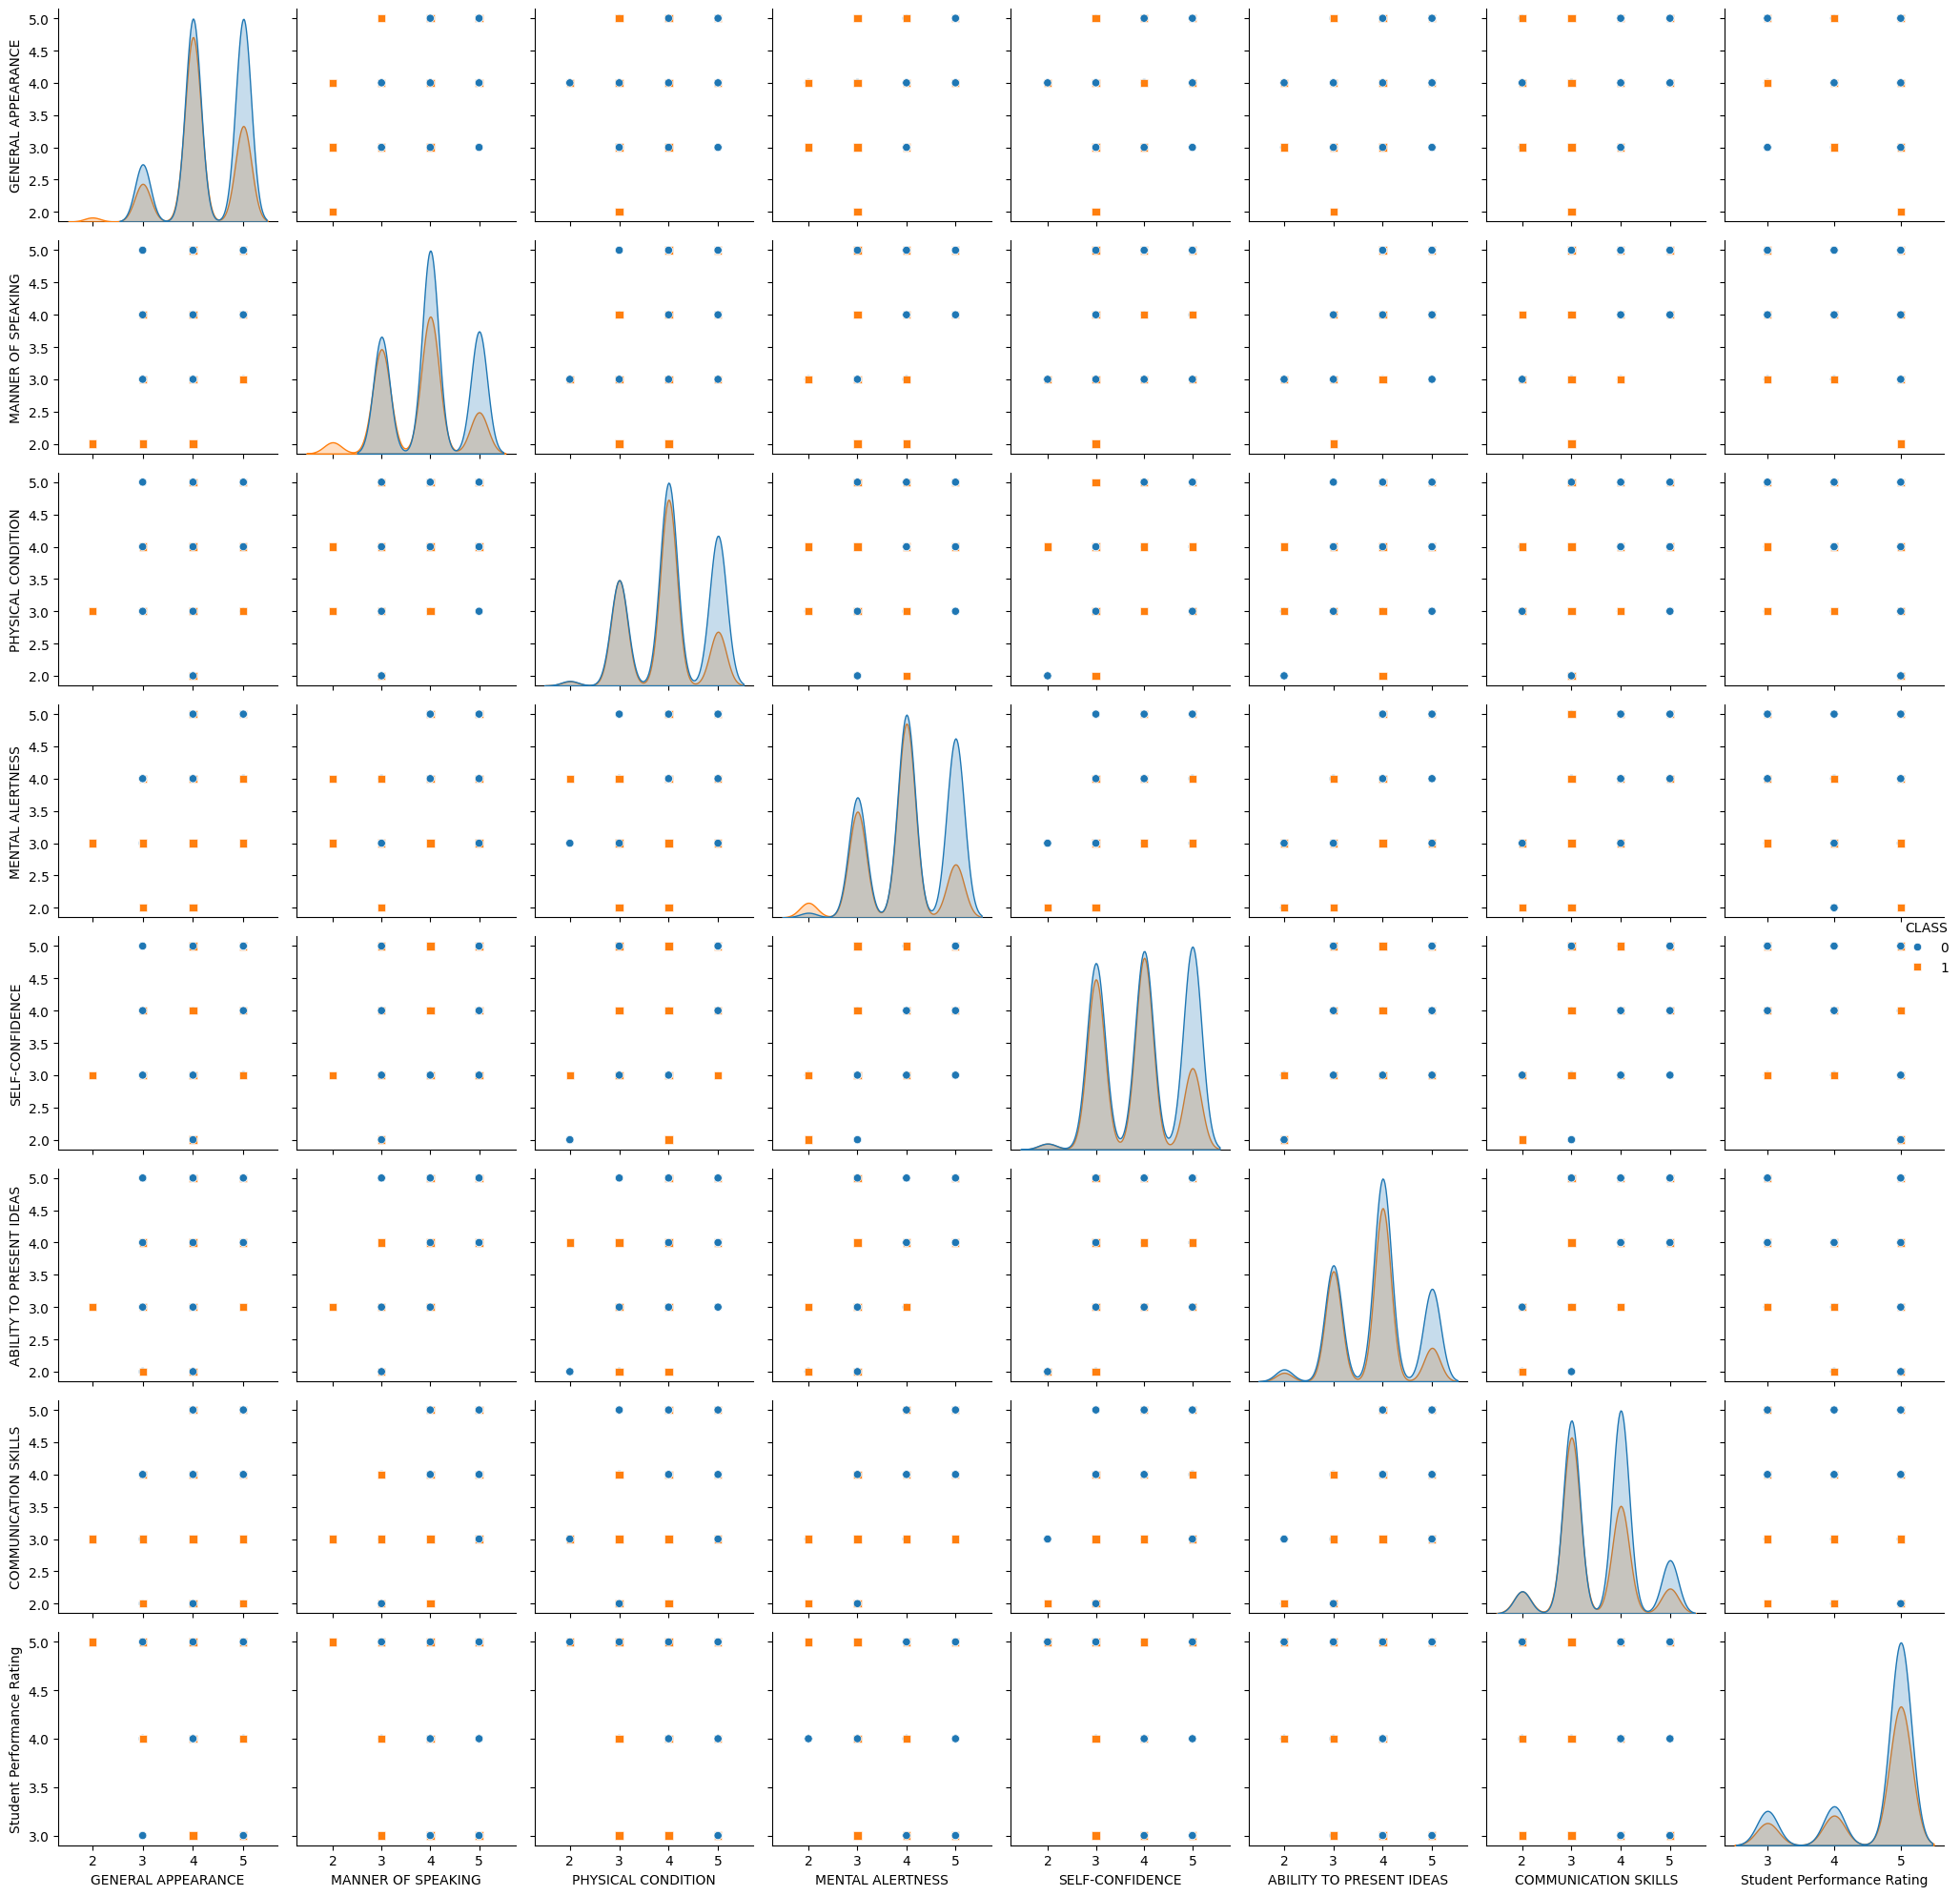

In [ ]:
import seaborn as sns
sns.pairplot(graph_df, hue='CLASS', markers=['o', 's'])
plt.tight_layout()
plt.show()

##Parallel Coordinate Plot

In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(graph_df, dimensions = list(graph_df.columns), color = 'CLASS', color_continuous_scale = 'Viridis', labels = zip(list(graph_df.columns),list(graph_df.columns)))
fig.update_layout(width=1600, plot_bgcolor='white', paper_bgcolor='white')
fig.show()

# Models of Machine Learning and Deep Learning

## Machine Learning Models

### SVM

In [ ]:
#1. SVM
#Employable = 0, LessEmployable = 1
custom_labels = ['Employable','LessEmployable']
encoder = LabelEncoder()
encoder.classes_=custom_labels
df['CLASS'] = encoder.fit_transform(df['CLASS'])

X = df[['GENERAL APPEARANCE','MANNER OF SPEAKING','PHYSICAL CONDITION','MENTAL ALERTNESS','SELF-CONFIDENCE','ABILITY TO PRESENT IDEAS','COMMUNICATION SKILLS','Student Performance Rating']]
y = df['CLASS']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = SVC(kernel='linear', C=1.0)

clf.fit(X_train_scaled, y_train)

y_pred_new = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_new)

print("Accuracy Model SVC(linear,C=1):", accuracy)

Accuracy Model SVC(linear,C=1): 0.5778894472361809


In [ ]:
#Use svm with grid search
svc_models = {
    'svc_model_1': {'C': [0.1, 1, 10], 'kernel': ['linear'],'gamma': [0.1, 1, 10],'random_state':[40]},
    'svc_model_2': {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 1, 10],'random_state':[40]},
    'svc_model_3': {'C': [0.1, 1, 10], 'kernel': ['sigmoid'], 'gamma':[0.1,1,10],'random_state':[40]},
    'svc_model_4': {'C': [0.1, 1, 10], 'kernel': ['poly'], 'gamma':[0.1,1,10],'random_state':[40]}
}
CV_list_svc = []
for model_name, params in svc_models.items():
    svc = SVC()
    grid_search = GridSearchCV(estimator=svc, param_grid=params, cv=3, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")
    CV_list_svc.append(grid_search.best_score_)


Best parameters for svc_model_1: {'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40}
Best score for svc_model_1: 0.5979035639412998

Best parameters for svc_model_2: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 40}
Best score for svc_model_2: 0.9115303983228511

Best parameters for svc_model_3: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40}
Best score for svc_model_3: 0.589517819706499



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best parameters for svc_model_4: {'C': 0.1, 'gamma': 10, 'kernel': 'poly', 'random_state': 40}
Best score for svc_model_4: 0.9064989517819706



#### Classification Report and Metrics of SVM

In [ ]:
!python --version

Python 3.10.12


In [ ]:
svc = SVC(C = 0.1, gamma = 1, kernel = 'rbf',random_state= 40)

svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
report_svc = pd.DataFrame(report_svc)
print("Classification Report")
report_svc.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_svc)
report_svc.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_svc)
report_svc.at['CV Score','Other Metrics'] = CV_list_svc[1]
report_svc

Classification Report


,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.906077,0.910638,0.907873,0.908358,0.907972,NaN
recall,0.939828,0.862903,0.907873,0.901366,0.907873,NaN
f1-score,0.922644,0.886128,0.907873,0.904386,0.907475,NaN
support,349.000000,248.000000,0.907873,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.809693
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.808867
CV Score,NaN,NaN,NaN,NaN,NaN,0.911530


#### Confusion Matrix of SVM

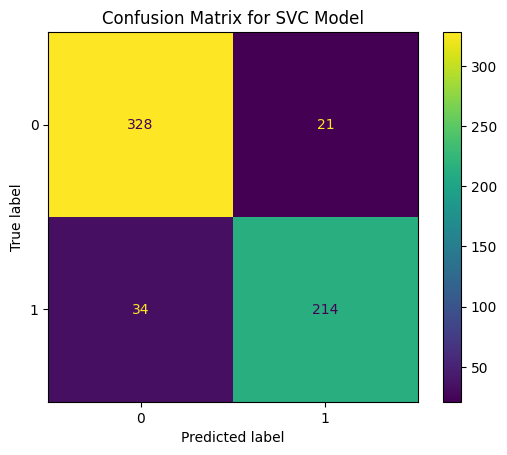

In [ ]:
Confusion_Matrix_test_svc = confusion_matrix(y_test, y_pred_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_svc, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for SVC Model")
plt.show()

#Employable = 0, LessEmployable = 1

#### ROC AUC of SVM

ROC AUC score SVC: 0.901365653017839


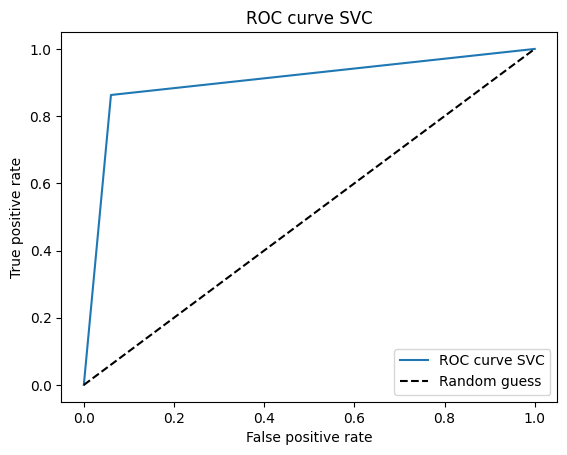

In [ ]:
roc_auc_svc = roc_auc_score(y_test, y_pred_svc, average = 'macro')

print('ROC AUC score SVC:', roc_auc_svc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

plt.plot(fpr, tpr, label='ROC curve SVC')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve SVC')
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
#2. Logistic regression ML

LogRegress = LogisticRegression(random_state=40, max_iter = 50)


LogRegress.fit(X_train_scaled, y_train)

y_pred_log = LogRegress.predict(X_test_scaled)
LogRegress.score(X_test_scaled,y_test)

0.5845896147403685

In [ ]:
#Grid Search Logistic Regression
param_grid = {
    'random_state':[40],
     'solver' : ['lbfgs'],
    'max_iter':[200,500,1000]
}
LogRegress = LogisticRegression()
grid_search = GridSearchCV(estimator = LogRegress, param_grid = param_grid, cv=3).fit(X_train_scaled, y_train)

best_params_log = grid_search.best_params_
best_score_log = grid_search.best_score_
print("Best hyperparameters:", best_params_log)
print("Best Score:", best_score_log)

Best hyperparameters: {'max_iter': 200, 'random_state': 40, 'solver': 'lbfgs'}
Best Score: 0.5974842767295597


#### Classification Report of Logistic Regression

In [ ]:
LogRegress = LogisticRegression(random_state = 40,solver = 'lbfgs', max_iter = 200).fit(X_train_scaled,y_train)
y_pred_log = LogRegress.predict(X_test_scaled)

report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_log = pd.DataFrame(report_log)
print("Classification Report")

report_log.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_log)
report_log.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_log)
report_log.at['CV Score','Other Metrics'] = best_score_log
report_log

Classification Report


,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.617169,0.500000,0.58459,0.558585,0.568496,NaN
recall,0.762178,0.334677,0.58459,0.548428,0.584590,NaN
f1-score,0.682051,0.400966,0.58459,0.541509,0.565286,NaN
support,349.000000,248.000000,0.58459,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.106529
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.101722
CV Score,NaN,NaN,NaN,NaN,NaN,0.597484


#### Confusion Matrix of Logistic Regression


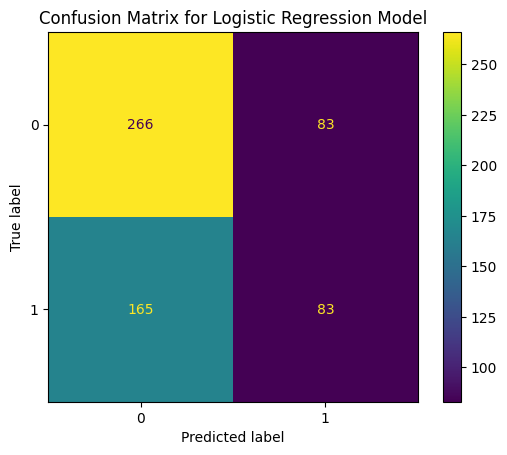

In [ ]:
Confusion_Matrix_test_log = confusion_matrix(y_test, y_pred_log)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_log, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

#Employable = 0, LessEmployable = 1

####ROC AUC of Logistic Regression


ROC AUC score Logistic Regression: 0.5484275348923191


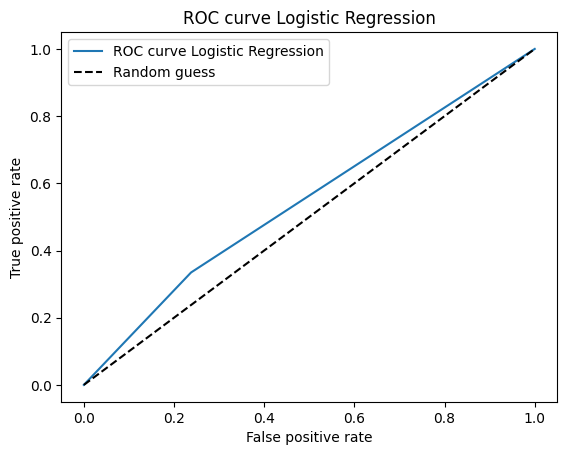

In [ ]:
roc_auc_log = roc_auc_score(y_test, y_pred_log, average = 'macro')

print('ROC AUC score Logistic Regression:', roc_auc_log)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

plt.plot(fpr, tpr, label='ROC curve Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Logistic Regression')
plt.legend()
plt.show()

### Decision Tree

In [ ]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = 15,
    max_features = None,
    random_state = 40,
    class_weight = None,
)

In [ ]:
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.9045226130653267

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, None],
    'random_state': [40],
    'class_weight': ['balanced']
}
decision_tree =  tree.DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid, cv=3, error_score='raise')
grid_search.fit(X_train, y_train)

best_params_DT = grid_search.best_params_
best_score_DT = grid_search.best_score_

print("Best Parameters:", best_params_DT)
print("Best Score:", best_score_DT)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'random_state': 40, 'splitter': 'random'}
Best Score: 0.9048218029350105


#### Classification Report of Decision Tree

In [ ]:
decision_tree =  tree.DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 15,
                                              random_state = 40, splitter = 'random').fit(X_train, y_train)
y_pred_DT = decision_tree.predict(X_test)

report_DT = classification_report(y_test, y_pred_DT, output_dict=True)
report_DT = pd.DataFrame(report_DT)
report_DT.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_DT)
report_DT.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_DT)
report_DT.at['CV Score','Other Metrics'] = best_score_DT
report_DT


,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.945783,0.867925,0.911223,0.906854,0.913440,NaN
recall,0.899713,0.927419,0.911223,0.913566,0.911223,NaN
f1-score,0.922173,0.896686,0.911223,0.909430,0.911586,NaN
support,349.000000,248.000000,0.911223,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.820393
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.819009
CV Score,NaN,NaN,NaN,NaN,NaN,0.904822


####Confusion Matrix for Decision Tree


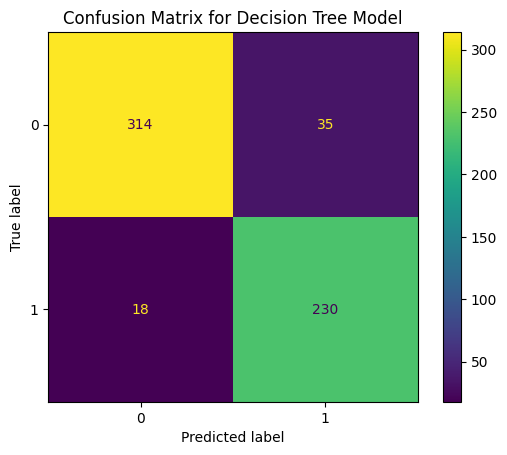

In [ ]:
Confusion_Matrix_test_DT = confusion_matrix(y_test, y_pred_DT)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_DT, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

####ROC AUC of Decision Tree


ROC AUC score DT: 0.91356641094371


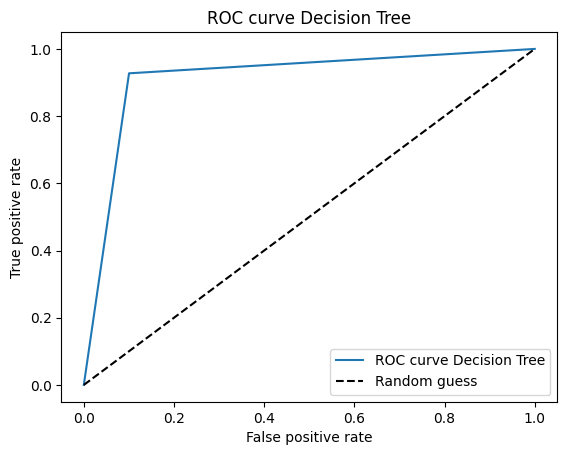

In [ ]:
roc_auc_DT = roc_auc_score(y_test, y_pred_DT, average = 'macro')

print('ROC AUC score DT:', roc_auc_DT)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DT)

plt.plot(fpr, tpr, label='ROC curve Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Decision Tree')
plt.legend()
plt.show()

###Random Forest

In [ ]:
param_grid = {
    'n_estimators': [5,10,20,50,100],
    'criterion': ['gini','entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'random_state':[40],
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params_RF = grid_search.best_params_
best_score_RF = grid_search.best_score_
print("Best Parameters:", best_params_RF)
print("Best Score:", best_score_RF)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 20, 'random_state': 40}
Best Score: 0.9069182389937107


#### Classification Report of Random Forest

In [ ]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 15, n_estimators = 20, random_state = 40).fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)

report_RF = classification_report(y_test, y_pred_RF, output_dict=True)
report_RF = pd.DataFrame(report_RF)
report_RF.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_RF)
report_RF.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_RF)
report_RF.at['CV Score','Other Metrics'] = cross_val_score(rf, X_train, y_train, cv = 3, scoring = 'accuracy').mean()
report_RF

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.914773,0.889796,0.904523,0.902284,0.904397,NaN
recall,0.922636,0.879032,0.904523,0.900834,0.904523,NaN
f1-score,0.918688,0.884381,0.904523,0.901534,0.904436,NaN
support,349.000000,248.000000,0.904523,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.803117
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.803074
CV Score,NaN,NaN,NaN,NaN,NaN,0.906918


#### Confusion Matrix Random Forest

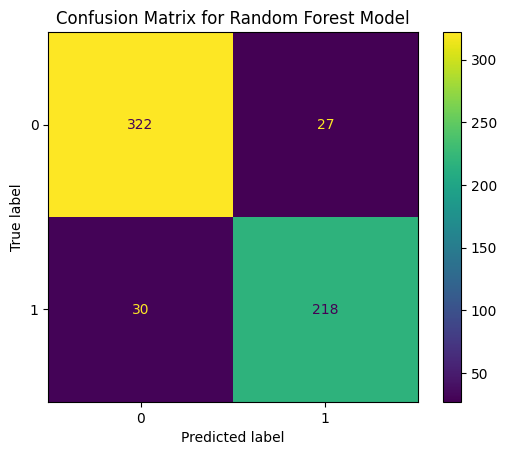

In [ ]:
Confusion_Matrix_test_RF = confusion_matrix(y_test, y_pred_RF)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_RF, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

#### ROC AUC of Random Forest

ROC AUC score RF: 0.9008341806081893


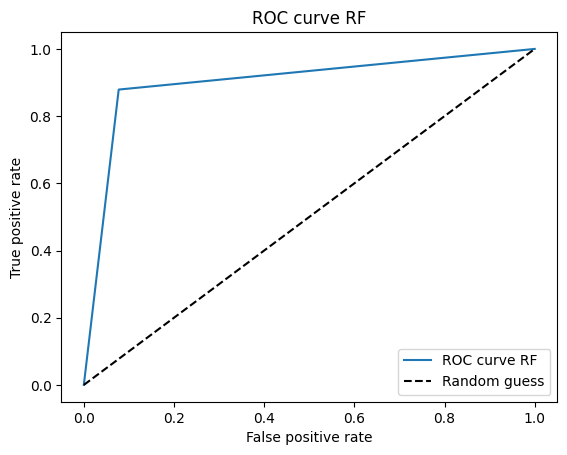

In [ ]:
roc_auc_RF = roc_auc_score(y_test, y_pred_RF, average = 'macro')

print('ROC AUC score RF:', roc_auc_RF)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)

plt.plot(fpr, tpr, label='ROC curve RF')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve RF')
plt.legend()
plt.show()

###Gradient Boosting

In [ ]:
#5 Gradient Boosting ML
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1,
                                  max_depth=5, random_state=40).fit(X_train, y_train)

gb.score(X_test, y_test)

0.8341708542713567

In [ ]:
param_grid = {
    'n_estimators': [5,10,20,50,100],
    'random_state':[40],
    'learning_rate':[1, 0.5,0.1,0.01,0.001],
    'max_depth':[5,10,15, None],
}
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params_GB = grid_search.best_params_
best_score_GB = grid_search.best_score_
print("Best Parameters:", best_params_GB)
print("Best Score:", best_score_GB)

Best Parameters: {'learning_rate': 1, 'max_depth': 10, 'n_estimators': 10, 'random_state': 40}
Best Score: 0.9077568134171908


#### Classification Report of Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state = 40, n_estimators = 10, max_depth = 10, learning_rate = 1).fit(X_train, y_train)
y_pred_GB = gb.predict(X_test)

report_GB = classification_report(y_test, y_pred_GB, output_dict=True)
report_GB = pd.DataFrame(report_GB)
report_GB.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_GB)
report_GB.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_GB)
report_GB.at['CV Score','Other Metrics'] = best_score_GB
report_GB

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.914773,0.889796,0.904523,0.902284,0.904397,NaN
recall,0.922636,0.879032,0.904523,0.900834,0.904523,NaN
f1-score,0.918688,0.884381,0.904523,0.901534,0.904436,NaN
support,349.000000,248.000000,0.904523,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.803117
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.803074
CV Score,NaN,NaN,NaN,NaN,NaN,0.907757


#### Confusion Matrix of Gradient Boosting

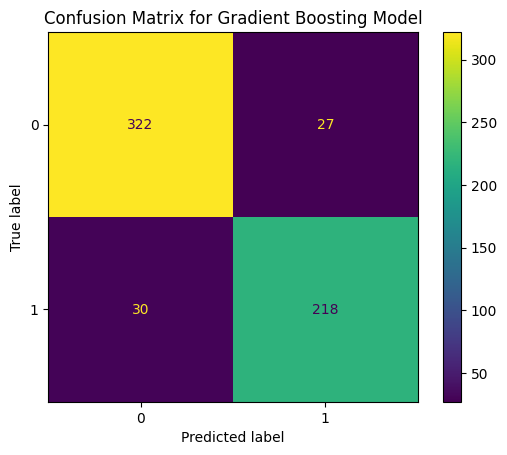

In [ ]:
Confusion_Matrix_test_GB = confusion_matrix(y_test, y_pred_GB)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_GB, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for Gradient Boosting Model")
plt.show()

#### ROC AUC of Gradient Boosting

ROC AUC score GB: 0.9008341806081893


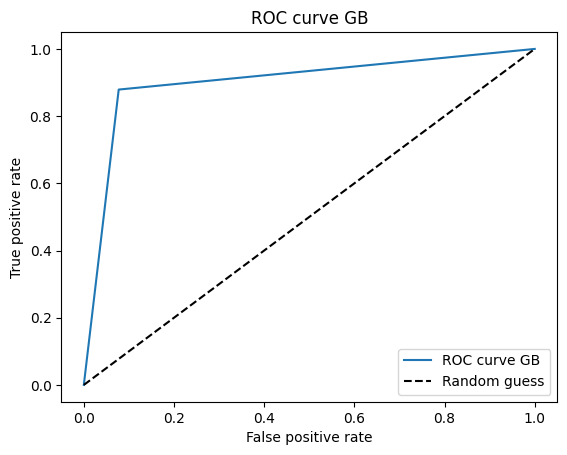

In [ ]:
roc_auc_GB = roc_auc_score(y_test, y_pred_GB, average = 'macro')

print('ROC AUC score GB:', roc_auc_GB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_GB)

plt.plot(fpr, tpr, label='ROC curve GB')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve GB')
plt.legend()
plt.show()

## Deep Learning Models

### ANN

In [ ]:
model_ANN = Sequential()
model_ANN.add(Dense(10, activation = 'relu', input_shape = (8,)))
model_ANN.add(Dense(10, activation = 'relu', input_shape = (25,)))
model_ANN.add(Dense(10, activation = 'relu', input_shape = (25,)))
model_ANN.add(Dense(1, activation = 'sigmoid'))
model_ANN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_ANN.fit(X_train_scaled, y_train, epochs = 100, batch_size = 64)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5735 - loss: 0.6756
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5722 - loss: 0.6625
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 0.6518
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6284 - loss: 0.6352
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6421 - loss: 0.6334
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.6390
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.6143
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6956 - loss: 0.6209
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7291 - loss: 0.6106
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7458 - loss: 0.5940
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7223 - loss: 0.5902
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - lo

In [ ]:
y_pred_proba_ANN= model_ANN.predict(X_test_scaled)
y_pred_ANN = np.round(y_pred_proba_ANN)
print("ANN Score:", accuracy_score(y_test,y_pred_ANN))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
ANN Score: 0.8659966499162479


In [ ]:
param_grid = {
    'units':[10],
    'batch_size':[32,64,128],
    'epochs':[25,50,100],
    'optimizer':['adam'],
    'loss':['binary_crossentropy']
}
best_CV_score_ANN = 0
best_params_ANN = {}
report_ANN = None
for units in param_grid['units']:
  for batch_size in param_grid['batch_size']:
    for optimizer in param_grid['optimizer']:
      for loss in param_grid['loss']:
        for epochs in param_grid['epochs']:
          model_ANN = Sequential()
          model_ANN.add(Dense(units, activation = 'relu', input_shape = (8,)))
          model_ANN.add(Dense(units, activation = 'relu',input_shape = (units,)))
          model_ANN.add(Dense(units, activation = 'relu',input_shape = (units,)))
          model_ANN.add(Dense(1, activation = 'sigmoid'))
          model_ANN.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])
          model_ANN.fit(X_train_scaled, y_train, epochs = epochs, batch_size = batch_size)
          keras_clf_ANN = KerasClassifier(model = model_ANN, optimizer=optimizer, epochs=epochs, verbose=0)
          scores = cross_val_score(keras_clf_ANN, X_train_scaled, y_train, cv=3, scoring='accuracy')
          scores = scores.mean()

          if scores > best_CV_score_ANN:
            best_CV_score_ANN = scores
            best_params_ANN = {'units': units, 'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'loss': loss}


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5929 - loss: 0.6763
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.6430
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6340 - loss: 0.6375
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - loss: 0.6165
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.6003
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5801
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.5748
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7397 - loss: 0.5500
Epoch 9/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7735 - loss: 0.5087
Epoch 10/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.4941
Epoch 11/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.4922
Epoch 12/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7841 - loss: 0.4895


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5412 - loss: 0.6882
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.6547
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - loss: 0.6238
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6859 - loss: 0.6046
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5818
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - loss: 0.5682
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7190 - loss: 0.5530
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7196 - loss: 0.5433
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7355 - loss: 0.5204
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7548 - loss: 0.5048
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.5003
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 0.4714


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5929 - loss: 0.6581
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.6317
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6365 - loss: 0.6313
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.6079
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.5902
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7560 - loss: 0.5681
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7731 - loss: 0.5490
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.5392
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7694 - loss: 0.5197
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.5088
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7822 - loss: 0.5044
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4484 - loss: 0.7846
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5549 - loss: 0.6907
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6020 - loss: 0.6711
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 0.6601
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.6458
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5911 - loss: 0.6395
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6115 - loss: 0.6268
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6312 - loss: 0.6249
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 0.6078
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.5929
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7261 - loss: 0.5764
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.5502


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4635 - loss: 0.7236
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5821 - loss: 0.6855
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6134 - loss: 0.6569
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 0.6422
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 0.6405
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.6191
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.6181
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7016 - loss: 0.5987
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.5931
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7438 - loss: 0.5764
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7273 - loss: 0.5722
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7349 - loss: 0.5605


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5289 - loss: 0.7095
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5599 - loss: 0.6671
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 0.6464
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6290 - loss: 0.6393
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 0.6311
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - loss: 0.6285
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - loss: 0.6112
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.6124
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.5957
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.5901
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7137 - loss: 0.5721
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7197 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5901 - loss: 0.6707
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 0.6554 
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.6425 
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6148 - loss: 0.6371  
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6108 - loss: 0.6364 
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.6330 
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6294 - loss: 0.6307 
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 0.6270 
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - loss: 0.6106  
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - loss: 0.6200  
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - loss: 0.6028 
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5515 - loss: 0.6945
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 0.6795 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 0.6613 
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 0.6554 
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6324 - loss: 0.6467 
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - loss: 0.6431 
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 0.6355 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - loss: 0.6328 
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.6281 
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.6273  
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.6239 
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5331 - loss: 0.6673
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 0.6492  
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.6324 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 0.6234 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - loss: 0.6101 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - loss: 0.6009  
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6012 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 0.5868 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - loss: 0.5882  
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7438 - loss: 0.5690 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.5644  
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [ ]:
model_ANN = Sequential()
model_ANN.add(Dense(best_params_ANN['units'], activation = 'relu', input_shape = (8,)))
model_ANN.add(Dense(best_params_ANN['units'], activation = 'relu',input_shape = (best_params_ANN['units'],)))
model_ANN.add(Dense(best_params_ANN['units'], activation = 'relu',input_shape = (best_params_ANN['units'],)))
model_ANN.add(Dense(1, activation = 'sigmoid'))
model_ANN.compile(loss = best_params_ANN['loss'], optimizer = best_params_ANN['optimizer'], metrics = ['accuracy'])
model_ANN.fit(X_train_scaled, y_train, epochs = best_params_ANN['epochs'], batch_size = best_params_ANN['batch_size'])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5378 - loss: 0.6846
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 0.6645
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.6563
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6072 - loss: 0.6536
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 0.6366
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6249 - loss: 0.6319
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 0.6205
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.6156
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - loss: 0.6063
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.6013
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - loss: 0.5866
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6657 - loss: 0.5787


In [ ]:
best_params_ANN

{'units': 10,
 'batch_size': 64,
 'epochs': 50,
 'optimizer': 'adam',
 'loss': 'binary_crossentropy'}

In [ ]:
model_ANN.save('/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/ANN/ANN.keras')

In [ ]:
saved_ANN_model = load_model('/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/ANN/ANN.keras')


In [ ]:
#Saving best parameters of ANN
try:
    with open("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/ANN/best_params_ANN.txt", "x") as f:
      for i in enumerate(best_params_ANN):
          f.write(f'{i[1]} = {best_params_ANN[i[1]]}\n')
except FileExistsError:
    print("The file already exists.")

The file already exists.


In [ ]:
#Loading the rest of the model
with open("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/ANN/best_params_ANN.txt", "r") as f:
  for line in f:
        print(line.strip())
        if line.strip() == 'optimizer = adam':
          optimizer_ANN = line.strip().split('= ')[-1]
        elif line.strip() == 'epochs = 50':
          epochs_ANN = line.strip().split('= ')[-1]

units = 10
batch_size = 64
epochs = 50
optimizer = adam
loss = binary_crossentropy


In [ ]:
model_ANN = saved_ANN_model

####Classification Report of ANN

In [ ]:
model_ANN = loaded_model_ANN


In [ ]:
y_pred_proba_ANN= model_ANN.predict(X_test_scaled)
y_pred_ANN = np.round(y_pred_proba_ANN)

report_ANN = classification_report(y_test, y_pred_ANN, output_dict=True)
report_ANN = pd.DataFrame(report_ANN)
print("Classification Report")
report_ANN.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_ANN)
report_ANN.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_ANN)
keras_clf_ANN = KerasClassifier(model = model_ANN, optimizer=optimizer_ANN, epochs=int(epochs_ANN), verbose=0)
#scores_ANN = cross_val_score(keras_clf_ANN, X_train_scaled, y_train, cv=3, scoring='accuracy')

#report_ANN.at['CV Score','Other Metrics'] = scores_ANN.mean()
report_ANN

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report


,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.827763,0.870192,0.842546,0.848978,0.845389,NaN
recall,0.922636,0.729839,0.842546,0.826237,0.842546,NaN
f1-score,0.872629,0.793860,0.842546,0.833244,0.839907,NaN
support,349.000000,248.000000,0.842546,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.674832
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.668067


In [ ]:
loaded_model_ANN

#### Confusion Matrix of ANN

In [ ]:
print("Confusion Matrix")
Confusion_Matrix_test_ANN = confusion_matrix(y_test, y_pred_ANN)
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_ANN, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for ANN Model")
plt.show()


####ROC AUC of ANN

In [ ]:
roc_auc_ANN = roc_auc_score(y_test, y_pred_ANN, average = 'macro')

print('ROC AUC score ANN:', roc_auc_ANN)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ANN)

plt.plot(fpr, tpr, label='ROC curve ANN')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ANN')
plt.legend()
plt.show()

###GRU

In [ ]:
#3. GRU DL
from keras.models import Sequential
from keras.layers import GRU, Dense

model_GRU = Sequential()
model_GRU.add(GRU(units=10, return_sequences=True, input_shape=(8,1)))
model_GRU.add(GRU(units=10, return_sequences = True, input_shape = (10,1)))
model_GRU.add(GRU(units = 10))
model_GRU.add(Dense(1, activation = 'sigmoid'))
model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_GRU.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5344 - loss: 0.6787
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5773 - loss: 0.6546
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5752 - loss: 0.6509
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5793 - loss: 0.6499
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5921 - loss: 0.6402
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5914 - loss: 0.6361
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5905 - loss: 0.6441
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6043 - loss: 0.6314
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6148 - loss: 0.6339
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5954 - loss: 0.6383
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6181 - loss: 0.6335
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy

In [ ]:
y_pred_proba_GRU= model_GRU.predict(X_test_scaled)
y_pred_GRU = np.round(y_pred_proba_GRU)
print("GRU Score:", accuracy_score(y_test,y_pred_GRU))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
GRU Score: 0.8040201005025126


In [ ]:
from scikeras.wrappers import KerasClassifier

param_grid = {
    'units':[10],
    'batch_size':[32,64,128],
    'epochs':[25,50,100],
    'optimizer':['adam'],
    'loss':['binary_crossentropy']
}
best_CV_score_GRU = 0
best_params_GRU = {}
for units in param_grid['units']:
  for batch_size in param_grid['batch_size']:
    for optimizer in param_grid['optimizer']:
      for loss in param_grid['loss']:
        for epochs in param_grid['epochs']:
          model_GRU = Sequential()
          model_GRU.add(GRU(units, return_sequences=True, input_shape=(8,1)))
          model_GRU.add(GRU(units, return_sequences=True, input_shape=(units,1)))
          model_GRU.add(GRU(units))
          model_GRU.add(Dense(1, activation = 'sigmoid'))
          model_GRU.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])
          #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

          model_GRU.fit(X_train_scaled, y_train, epochs = epochs, batch_size = batch_size)

          keras_clf_GRU = KerasClassifier(model = model_GRU, optimizer=optimizer, epochs=epochs, verbose=0)
          scores = cross_val_score(keras_clf_GRU, X_train_scaled, y_train, cv=3, scoring='accuracy')
          scores = scores.mean()

          if scores > best_CV_score_GRU:
            best_CV_score_GRU = scores
            best_params_GRU = {'units': units, 'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'loss': loss}



Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4937 - loss: 0.6904
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5917 - loss: 0.6475
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5753 - loss: 0.6555
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5929 - loss: 0.6383
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5615 - loss: 0.6568
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5771 - loss: 0.6475
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5914 - loss: 0.6449
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6009 - loss: 0.6420
Epoch 9/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6064 - loss: 0.6413
Epoch 10/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5965 - loss: 0.6406
Epoch 11/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6138 - loss: 0.6464
Epoch 12/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5838 - loss: 0.6669
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5794 - loss: 0.6582
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5852 - loss: 0.6485
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5625 - loss: 0.6529
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5844 - loss: 0.6510
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5953 - loss: 0.6417
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5975 - loss: 0.6351
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5964 - loss: 0.6394
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6064 - loss: 0.6396
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6171 - loss: 0.6361
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6146 - loss: 0.6262
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6337 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5218 - loss: 0.6844
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5727 - loss: 0.6547
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5637 - loss: 0.6521
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5909 - loss: 0.6470
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5817 - loss: 0.6488
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5942 - loss: 0.6395
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5882 - loss: 0.6451
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5865 - loss: 0.6373
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6156 - loss: 0.6420
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6250 - loss: 0.6339
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6106 - loss: 0.6441
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5715 - loss: 0.6794
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5667 - loss: 0.6547
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5888 - loss: 0.6509
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5611 - loss: 0.6543
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5682 - loss: 0.6440
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5876 - loss: 0.6445
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5768 - loss: 0.6476
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5898 - loss: 0.6435
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5862 - loss: 0.6477
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5984 - loss: 0.6429
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6235 - loss: 0.6404
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6050 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5381 - loss: 0.6826
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5637 - loss: 0.6603
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5795 - loss: 0.6599
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5813 - loss: 0.6434
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5755 - loss: 0.6486
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5686 - loss: 0.6431
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6020 - loss: 0.6395
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6016 - loss: 0.6447
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6176 - loss: 0.6303
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6213 - loss: 0.6371
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6210 - loss: 0.6348
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6406 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5593 - loss: 0.6758
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5572 - loss: 0.6595
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5587 - loss: 0.6582
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5848 - loss: 0.6482
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5730 - loss: 0.6521
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5783 - loss: 0.6437
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6103 - loss: 0.6374
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6088 - loss: 0.6401
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6070 - loss: 0.6458
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6021 - loss: 0.6390
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6179 - loss: 0.6397
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5777 - loss: 0.6827
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5608 - loss: 0.6650
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5655 - loss: 0.6604
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5678 - loss: 0.6568
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5687 - loss: 0.6529
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5764 - loss: 0.6478
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5641 - loss: 0.6503
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5710 - loss: 0.6408
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6068 - loss: 0.6425
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5889 - loss: 0.6553
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5985 - loss: 0.6427
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6015 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5486 - loss: 0.6862
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5754 - loss: 0.6661
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5867 - loss: 0.6551
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5773 - loss: 0.6552
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5475 - loss: 0.6579
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5662 - loss: 0.6489
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5716 - loss: 0.6531
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5849 - loss: 0.6427
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5856 - loss: 0.6467
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5749 - loss: 0.6478
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6281 - loss: 0.6304
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5925 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4707 - loss: 0.6961
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5799 - loss: 0.6763
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5459 - loss: 0.6713
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5616 - loss: 0.6617
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5664 - loss: 0.6553
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5668 - loss: 0.6583
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5530 - loss: 0.6561
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5666 - loss: 0.6482
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5610 - loss: 0.6509
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5806 - loss: 0.6388
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5672 - loss: 0.6487
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

In [ ]:
model_GRU = Sequential()
model_GRU.add(Dense(best_params_GRU['units'], activation = 'relu', input_shape = (8,)))
model_GRU.add(Dense(best_params_GRU['units'], activation = 'relu',input_shape = (best_params_GRU['units'],)))
model_GRU.add(Dense(best_params_GRU['units'], activation = 'relu',input_shape = (best_params_GRU['units'],)))
model_GRU.add(Dense(1, activation = 'sigmoid'))
model_GRU.compile(loss = best_params_GRU['loss'], optimizer = best_params_GRU['optimizer'], metrics = ['accuracy'])
model_GRU.fit(X_train_scaled, y_train, epochs = best_params_GRU['epochs'], batch_size = best_params_GRU['batch_size'])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5514 - loss: 0.6830
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6161 - loss: 0.6502
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6381
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6975 - loss: 0.6209
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7155 - loss: 0.6075
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7090 - loss: 0.5861
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7270 - loss: 0.5647
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.5582
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.5149
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8216 - loss: 0.5024
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.5011
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - lo

In [ ]:
best_params_GRU

{'units': 10,
 'batch_size': 32,
 'epochs': 100,
 'optimizer': 'adam',
 'loss': 'binary_crossentropy'}

In [ ]:
model_GRU.save('/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/GRU/GRU.keras')

In [ ]:
saved_GRU_model = load_model('/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/GRU/GRU.keras')

In [ ]:
#Saving best parameters of GRU
try:
    with open("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/GRU/best_params_GRU.txt", "x") as f:
      for i in enumerate(best_params_GRU):
          f.write(f'{i[1]} = {best_params_GRU[i[1]]}\n')
except FileExistsError:
    print("The file already exists.")

The file already exists.


In [ ]:
#Part 2 model saved
with open("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/GRU/best_params_GRU.txt", "r") as f:
  for line in f:
        print(line.strip())
        if line.strip() == 'optimizer = adam':
          optimizer_GRU = line.strip().split('= ')[-1]
        elif line.strip() == 'epochs = 100':
          epochs_GRU = line.strip().split('= ')[-1]

units = 10
batch_size = 32
epochs = 100
optimizer = adam
loss = binary_crossentropy


In [ ]:
model_GRU = saved_GRU_model

####Classification Report of GRU

In [ ]:
y_pred_proba_GRU= model_GRU.predict(X_test_scaled)
y_pred_GRU = np.round(y_pred_proba_GRU)

report_GRU = classification_report(y_test, y_pred_GRU, output_dict=True)
report_GRU = pd.DataFrame(report_GRU)
print("Classification Report")
report_GRU.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_GRU)
report_GRU.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_GRU)

keras_clf_GRU = KerasClassifier(model = model_GRU, optimizer=optimizer_GRU, epochs=int(epochs_GRU), verbose=0)
scores_GRU = cross_val_score(keras_clf_GRU, X_train_scaled, y_train, cv=3, scoring='accuracy')

report_GRU.at['CV Score','Other Metrics'] = scores_GRU.mean()
report_GRU

####Confusion Matrix of GRU

In [ ]:
Confusion_Matrix_test_GRU = confusion_matrix(y_test, y_pred_GRU)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_GRU, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for GRU Model")
plt.show()

####ROC AUC of GRU

In [ ]:
roc_auc_GRU = roc_auc_score(y_test, y_pred_GRU, average = 'macro')

print('ROC AUC score GRU:', roc_auc_GRU)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_GRU)

plt.plot(fpr, tpr, label='ROC curve GRU')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve GRU')
plt.legend()
plt.show()

###LSTM

In [ ]:
#4. LSTM DL
from keras.layers import GRU, Dense, LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(units=10, return_sequences=True, input_shape=(8, 1)))
model_LSTM.add(LSTM(units=10, return_sequences=True, input_shape=(10, 1)))
model_LSTM.add(LSTM(units = 10))
model_LSTM.add(Dense(1, activation = 'sigmoid'))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_LSTM.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5822 - loss: 0.6823
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5679 - loss: 0.6831
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5701 - loss: 0.6809
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5871 - loss: 0.6700
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5701 - loss: 0.6604
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5709 - loss: 0.6584
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5811 - loss: 0.6575
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5985 - loss: 0.6400
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5611 - loss: 0.6528
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5694 - loss: 0.6626
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5803 - loss: 0.6439
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy:

In [ ]:
y_pred_proba_LSTM= model_LSTM.predict(X_test_scaled)
y_pred_LSTM = np.round(y_pred_proba_LSTM)
print("LSTM Score:", accuracy_score(y_test,y_pred_LSTM))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
LSTM Score: 0.5728643216080402


In [ ]:
from scikeras.wrappers import KerasClassifier

param_grid = {
    'units':[10],
    'batch_size':[32,64,128],
    'epochs':[25,50,100],
    'optimizer':['adam'],
    'loss':['binary_crossentropy']
}
best_CV_score_LSTM = 0
best_params_LSTM = {}
for units in param_grid['units']:
  for batch_size in param_grid['batch_size']:
    for optimizer in param_grid['optimizer']:
      for loss in param_grid['loss']:
        for epochs in param_grid['epochs']:
          model_LSTM = Sequential()
          model_LSTM.add(LSTM(units, return_sequences=True, input_shape=(8,1)))
          model_LSTM.add(LSTM(units, return_sequences=True, input_shape=(units,1)))
          model_LSTM.add(LSTM(units))
          model_LSTM.add(Dense(1, activation = 'sigmoid'))
          model_LSTM.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

          #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
          model_LSTM.fit(X_train_scaled, y_train, epochs = epochs, batch_size = batch_size)

          keras_clf_LSTM = KerasClassifier(model = model_LSTM, optimizer=optimizer, epochs=epochs, verbose=0)
          scores = cross_val_score(keras_clf_LSTM, X_train_scaled, y_train, cv=3, scoring='accuracy')
          scores = scores.mean()

          if scores > best_CV_score_LSTM:
            best_CV_score_LSTM = scores
            best_params_LSTM = {'units': units, 'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer, 'loss': loss}

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5587 - loss: 0.6817
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5795 - loss: 0.6450
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5729 - loss: 0.6476
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5959 - loss: 0.6437
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5513 - loss: 0.6586
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5803 - loss: 0.6382
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5932 - loss: 0.6416
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5771 - loss: 0.6398
Epoch 9/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6059 - loss: 0.6421
Epoch 10/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6043 - loss: 0.6435
Epoch 11/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5797 - loss: 0.6404
Epoch 12/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6110 - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5235 - loss: 0.6847
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5810 - loss: 0.6477
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5441 - loss: 0.6459
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5658 - loss: 0.6472
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5763 - loss: 0.6436
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5793 - loss: 0.6420
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5844 - loss: 0.6420
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5991 - loss: 0.6363
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6239 - loss: 0.6341
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5975 - loss: 0.6430
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6134 - loss: 0.6259
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6400 - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5828 - loss: 0.6820
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5854 - loss: 0.6481
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5709 - loss: 0.6573
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5661 - loss: 0.6446
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5742 - loss: 0.6361
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5828 - loss: 0.6429
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5762 - loss: 0.6413
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5952 - loss: 0.6435
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6110 - loss: 0.6376
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6198 - loss: 0.6323
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6401 - loss: 0.6303
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.645

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5069 - loss: 0.6909
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5805 - loss: 0.6674
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5674 - loss: 0.6491
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5741 - loss: 0.6516
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5793 - loss: 0.6488
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5756 - loss: 0.6472
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5867 - loss: 0.6418
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5820 - loss: 0.6407
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5762 - loss: 0.6434
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5949 - loss: 0.6342
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6205 - loss: 0.6377
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6235 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5182 - loss: 0.6902
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5937 - loss: 0.6624
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5614 - loss: 0.6541
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5918 - loss: 0.6385
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5597 - loss: 0.6508
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5582 - loss: 0.6471
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5534 - loss: 0.6469
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5802 - loss: 0.6397
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5925 - loss: 0.6354
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5804 - loss: 0.6485
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6126 - loss: 0.6318
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6047 - los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5484 - loss: 0.6902
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5919 - loss: 0.6683
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5716 - loss: 0.6513
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5697 - loss: 0.6507
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5817 - loss: 0.6421
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5577 - loss: 0.6412
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5692 - loss: 0.6454
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5928 - loss: 0.6352
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5837 - loss: 0.6465
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6193 - loss: 0.6340
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6082 - loss: 0.6394
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5591 - loss: 0.6873
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5964 - loss: 0.6702
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5564 - loss: 0.6578
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5714 - loss: 0.6519
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5881 - loss: 0.6443
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5750 - loss: 0.6496
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5850 - loss: 0.6373
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5841 - loss: 0.6415
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5713 - loss: 0.6528
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5603 - loss: 0.6536
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5725 - loss: 0.6481
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5695 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4551 - loss: 0.6959
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5691 - loss: 0.6814
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5912 - loss: 0.6665
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5726 - loss: 0.6590
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5584 - loss: 0.6540
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5618 - loss: 0.6571
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5692 - loss: 0.6545
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5654 - loss: 0.6572
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5782 - loss: 0.6454
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5808 - loss: 0.6431
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5735 - loss: 0.6579
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5749 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5744 - loss: 0.6854
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5571 - loss: 0.6668
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5618 - loss: 0.6585
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5788 - loss: 0.6443
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5727 - loss: 0.6490
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5760 - loss: 0.6453
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5686 - loss: 0.6473
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5915 - loss: 0.6394
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5810 - loss: 0.6417
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5797 - loss: 0.6445
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5605 - loss: 0.6463
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy:

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Dense(best_params_LSTM['units'], activation = 'relu', input_shape = (8,)))
model_LSTM.add(Dense(best_params_LSTM['units'], activation = 'relu',input_shape = (best_params_LSTM['units'],)))
model_LSTM.add(Dense(best_params_LSTM['units'], activation = 'relu',input_shape = (best_params_LSTM['units'],)))
model_LSTM.add(Dense(1, activation = 'sigmoid'))
model_LSTM.compile(loss = best_params_LSTM['loss'], optimizer = best_params_LSTM['optimizer'], metrics = ['accuracy'])
model_LSTM.fit(X_train_scaled, y_train, epochs = best_params_LSTM['epochs'], batch_size = best_params_LSTM['batch_size'])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5409 - loss: 0.6841
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6150 - loss: 0.6538
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.6461
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - loss: 0.6204
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 0.6234
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - loss: 0.6017
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.5867
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.5731
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7180 - loss: 0.5565
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7350 - loss: 0.5342
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.5355
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - lo

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Dense(best_params_LSTM['units'], activation = 'relu', input_shape = (8,)))
model_LSTM.add(Dense(best_params_LSTM['units'], activation = 'relu',input_shape = (best_params_LSTM['units'],)))
model_LSTM.add(Dense(best_params_LSTM['units'], activation = 'relu',input_shape = (best_params_LSTM['units'],)))
model_LSTM.add(Dense(1, activation = 'sigmoid'))
model_LSTM.compile(loss = best_params_LSTM['loss'], optimizer = best_params_LSTM['optimizer'], metrics = ['accuracy'])
model_LSTM.fit(X_train_scaled, y_train, epochs = best_params_LSTM['epochs'], batch_size = best_params_LSTM['batch_size'])

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6051 - loss: 0.6712
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - loss: 0.6353
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.6262
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.5978
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.5921
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.5835
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 0.5718
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7314 - loss: 0.5507
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.5416
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.5346
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7438 - loss: 0.5162
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
model_LSTM.save('/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/LSTM/LSTM.keras')

In [ ]:
saved_LSTM_model = load_model('/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/LSTM/LSTM.keras')

In [ ]:
#Saving best parameters of LSTM
try:
    with open("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/LSTM/best_params_LSTM.txt", "x") as f:
      for i in enumerate(best_params_LSTM):
          f.write(f'{i[1]} = {best_params_LSTM[i[1]]}\n')
except FileExistsError:
    print("The file already exists.")

The file already exists.


In [ ]:
with open("/content/drive/MyDrive/Becario/Mes 1/Semana 2, 3 y 4/Students Employability/LSTM/best_params_LSTM.txt", "r") as f:
  for line in f:
        print(line.strip())
        if line.strip() == 'optimizer = adam':
          optimizer_LSTM = line.strip().split('= ')[-1]
        elif line.strip() == 'epochs = 100':
          epochs_LSTM = line.strip().split('= ')[-1]

units = 10
batch_size = 32
epochs = 100
optimizer = adam
loss = binary_crossentropy


In [ ]:
model_LSTM = saved_LSTM_model

#### Classification Report of LSTM

In [ ]:
y_pred_proba_LSTM= model_LSTM.predict(X_test_scaled)
y_pred_LSTM = np.round(y_pred_proba_LSTM)

report_LSTM = classification_report(y_test, y_pred_LSTM, output_dict=True)
report_LSTM = pd.DataFrame(report_LSTM)
print("Classification Report")
report_LSTM.at['Matthew Corr','Other Metrics'] = matthews_corrcoef(y_test, y_pred_LSTM)
report_LSTM.at['Cohen Kappa','Other Metrics'] = cohen_kappa_score(y_test, y_pred_LSTM)
keras_clf_LSTM = KerasClassifier(model = model_LSTM, optimizer=optimizer_LSTM, epochs=int(epochs_LSTM), verbose=0)
scores_LSTM = cross_val_score(keras_clf_LSTM, X_train_scaled, y_train, cv=3, scoring='accuracy')

report_LSTM.at['CV Score','Other Metrics'] = scores_LSTM.mean()
report_LSTM

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report


,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.935673,0.886275,0.914573,0.910974,0.915152,NaN
recall,0.916905,0.911290,0.914573,0.914098,0.914573,NaN
f1-score,0.926194,0.898608,0.914573,0.912401,0.914735,NaN
support,349.000000,248.000000,0.914573,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.825065
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.824827
CV Score,NaN,NaN,NaN,NaN,NaN,0.906499


####Confusion Matrix of LSTM

Confusion Matrix


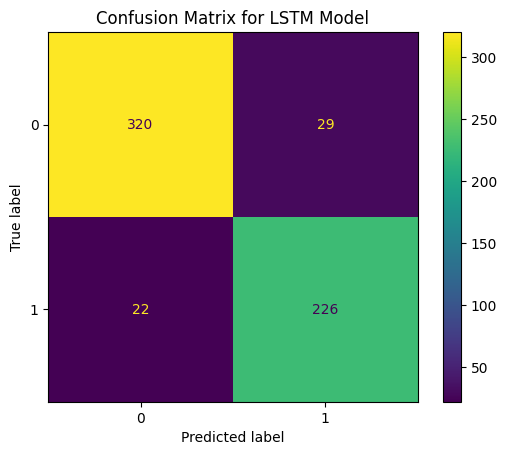

In [ ]:
print("Confusion Matrix")
Confusion_Matrix_test_LSTM = confusion_matrix(y_test, y_pred_LSTM)
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_test_LSTM, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for LSTM Model")
plt.show()


####ROC AUC of LSTM

ROC AUC score LSTM: 0.9140978833533596


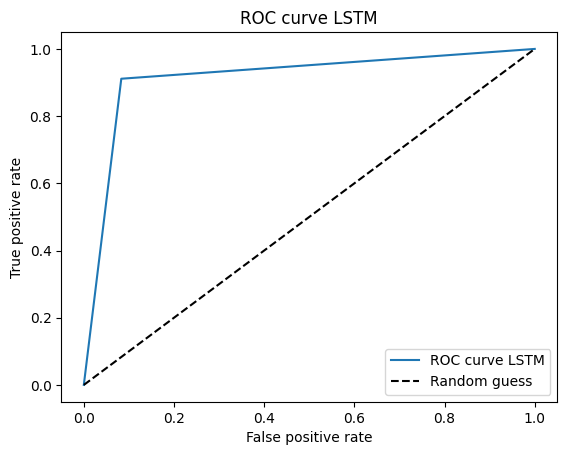

In [ ]:
roc_auc_LSTM = roc_auc_score(y_test, y_pred_LSTM, average = 'macro')

print('ROC AUC score LSTM:', roc_auc_LSTM)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LSTM)

plt.plot(fpr, tpr, label='ROC curve LSTM')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LSTM')
plt.legend()
plt.show()

##Reports, Confusion Matrixes and ROC AUC curve

In [ ]:
report_svc

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.906077,0.910638,0.907873,0.908358,0.907972,NaN
recall,0.939828,0.862903,0.907873,0.901366,0.907873,NaN
f1-score,0.922644,0.886128,0.907873,0.904386,0.907475,NaN
support,349.000000,248.000000,0.907873,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.809693
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.808867
CV Score,NaN,NaN,NaN,NaN,NaN,0.911530


In [ ]:
report_log

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.617169,0.500000,0.58459,0.558585,0.568496,NaN
recall,0.762178,0.334677,0.58459,0.548428,0.584590,NaN
f1-score,0.682051,0.400966,0.58459,0.541509,0.565286,NaN
support,349.000000,248.000000,0.58459,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.106529
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.101722
CV Score,NaN,NaN,NaN,NaN,NaN,0.597484


In [ ]:
report_DT

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.945783,0.867925,0.911223,0.906854,0.913440,NaN
recall,0.899713,0.927419,0.911223,0.913566,0.911223,NaN
f1-score,0.922173,0.896686,0.911223,0.909430,0.911586,NaN
support,349.000000,248.000000,0.911223,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.820393
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.819009
CV Score,NaN,NaN,NaN,NaN,NaN,0.904822


In [ ]:
report_RF

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.914773,0.889796,0.904523,0.902284,0.904397,NaN
recall,0.922636,0.879032,0.904523,0.900834,0.904523,NaN
f1-score,0.918688,0.884381,0.904523,0.901534,0.904436,NaN
support,349.000000,248.000000,0.904523,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.803117
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.803074
CV Score,NaN,NaN,NaN,NaN,NaN,0.906918


In [ ]:
report_GB

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.914773,0.889796,0.904523,0.902284,0.904397,NaN
recall,0.922636,0.879032,0.904523,0.900834,0.904523,NaN
f1-score,0.918688,0.884381,0.904523,0.901534,0.904436,NaN
support,349.000000,248.000000,0.904523,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.803117
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.803074
CV Score,NaN,NaN,NaN,NaN,NaN,0.907757


In [ ]:
report_ANN

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.827763,0.870192,0.842546,0.848978,0.845389,NaN
recall,0.922636,0.729839,0.842546,0.826237,0.842546,NaN
f1-score,0.872629,0.793860,0.842546,0.833244,0.839907,NaN
support,349.000000,248.000000,0.842546,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.674832
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.668067
CV Score,NaN,NaN,NaN,NaN,NaN,0.881761


In [ ]:
report_GRU

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.934718,0.869231,0.906198,0.901974,0.907514,NaN
recall,0.902579,0.911290,0.906198,0.906935,0.906198,NaN
f1-score,0.918367,0.889764,0.906198,0.904066,0.906485,NaN
support,349.000000,248.000000,0.906198,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.808894
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.808210
CV Score,NaN,NaN,NaN,NaN,NaN,0.901887


In [ ]:
report_LSTM

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,0.935673,0.886275,0.914573,0.910974,0.915152,NaN
recall,0.916905,0.911290,0.914573,0.914098,0.914573,NaN
f1-score,0.926194,0.898608,0.914573,0.912401,0.914735,NaN
support,349.000000,248.000000,0.914573,597.000000,597.000000,NaN
Matthew Corr,NaN,NaN,NaN,NaN,NaN,0.825065
Cohen Kappa,NaN,NaN,NaN,NaN,NaN,0.824827
CV Score,NaN,NaN,NaN,NaN,NaN,0.904822


In [ ]:
report_RF == report_GB

,0,1,accuracy,macro avg,weighted avg,Other Metrics
precision,True,True,True,True,True,False
recall,True,True,True,True,True,False
f1-score,True,True,True,True,True,False
support,True,True,True,True,True,False
Matthew Corr,False,False,False,False,False,True
Cohen Kappa,False,False,False,False,False,True
CV Score,False,False,False,False,False,False


In [ ]:
reports  = [report_svc, report_log, report_DT, report_RF, report_GB,
                          report_ANN, report_GRU, report_LSTM]
Names_Models = ['SVC','Logistic Regression', 'Decisison Tree', 'Random Forest', 'Gradient Boosting',
                'ANN', 'GRU', 'LSTM']
for i, column in enumerate(reports):
    row = i // 4
    col = i % 4
    print(f'Classification Report of {Names_Models[i]}')
    transposed = column.transpose()
    #print(np.round(transposed.at['0','precision'],6))
    print(transposed,'\n')


Classification Report of SVC
               precision    recall  f1-score     support  Matthew Corr  \
0               0.906077  0.939828  0.922644  349.000000           NaN   
1               0.910638  0.862903  0.886128  248.000000           NaN   
accuracy        0.907873  0.907873  0.907873    0.907873           NaN   
macro avg       0.908358  0.901366  0.904386  597.000000           NaN   
weighted avg    0.907972  0.907873  0.907475  597.000000           NaN   
Other Metrics        NaN       NaN       NaN         NaN      0.809693   

               Cohen Kappa  CV Score  
0                      NaN       NaN  
1                      NaN       NaN  
accuracy               NaN       NaN  
macro avg              NaN       NaN  
weighted avg           NaN       NaN  
Other Metrics     0.808867   0.91153   

Classification Report of Logistic Regression
               precision    recall  f1-score    support  Matthew Corr  \
0               0.617169  0.762178  0.682051  349.00000    

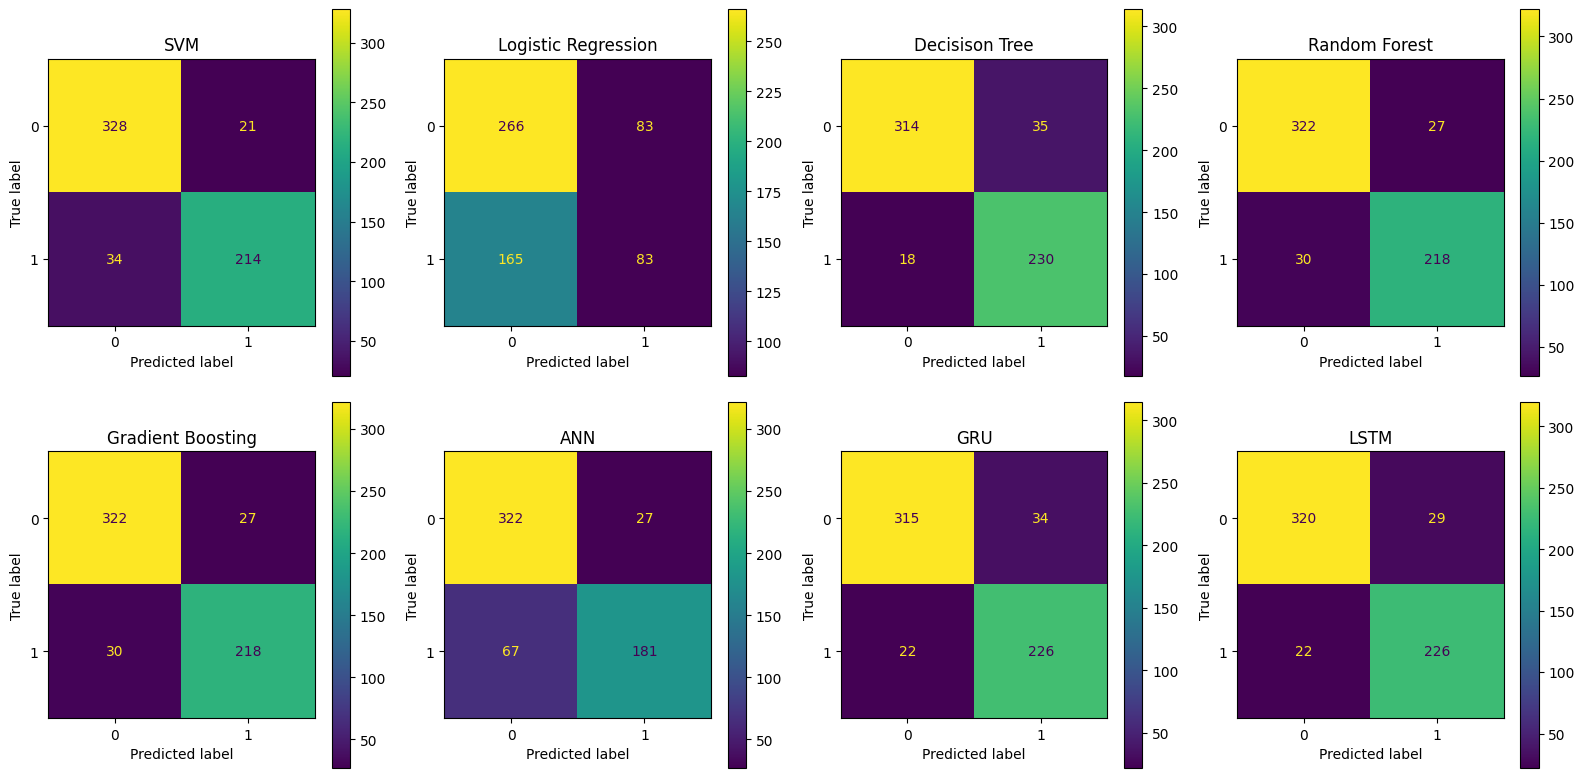

In [ ]:
Confusion_Matrix_tests = [Confusion_Matrix_test_svc, Confusion_Matrix_test_log, Confusion_Matrix_test_DT, Confusion_Matrix_test_RF, Confusion_Matrix_test_GB,
                          Confusion_Matrix_test_ANN, Confusion_Matrix_test_GRU, Confusion_Matrix_test_LSTM]
Names_Models = ['SVM','Logistic Regression', 'Decisison Tree', 'Random Forest', 'Gradient Boosting',
                'ANN', 'GRU', 'LSTM']
fig, axes = plt.subplots(2,4, figsize=(16, 8))
for i, column in enumerate(Confusion_Matrix_tests):
    row = i // 4
    col = i % 4
    disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_tests[i], display_labels=clf.classes_)
    disp.plot(ax=axes[row, col])
    axes[row,col].set_title(f'{Names_Models[i]}')
plt.tight_layout()
plt.show()

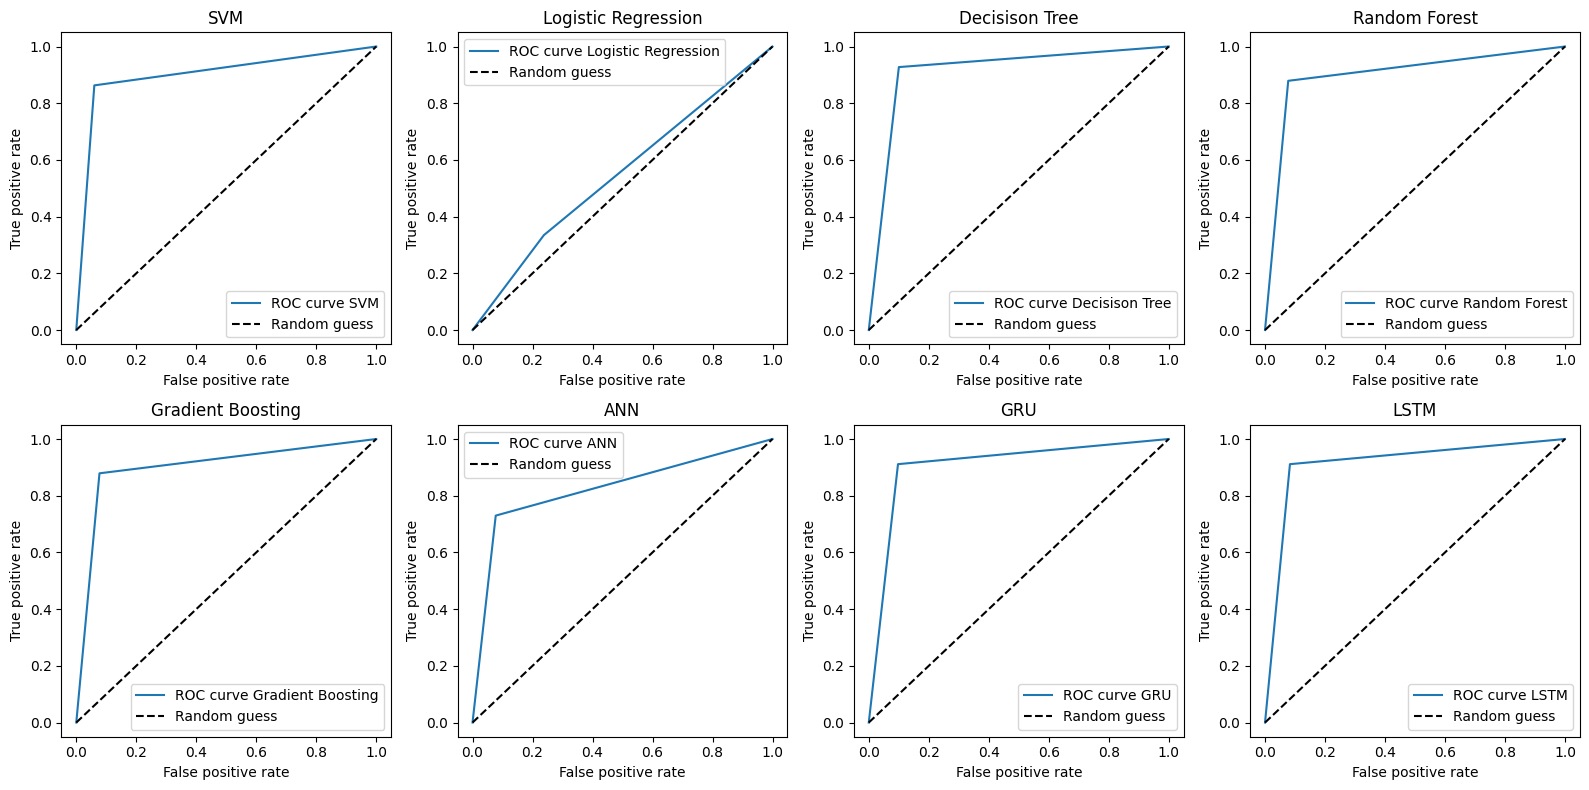

In [ ]:
y_preds = [y_pred_svc, y_pred_log, y_pred_DT, y_pred_RF, y_pred_GB,
           y_pred_ANN, y_pred_GRU, y_pred_LSTM]
Names_Models = ['SVM','Logistic Regression', 'Decisison Tree', 'Random Forest', 'Gradient Boosting',
                'ANN', 'GRU', 'LSTM']
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, column in enumerate(y_preds):
    row = i // 4
    col = i % 4
    fpr, tpr, thresholds = roc_curve(y_test, y_preds[i])
    axes[row,col].plot(fpr, tpr, label=f'ROC curve {Names_Models[i]}')
    axes[row,col].plot([0, 1], [0, 1], 'k--', label='Random guess')
    axes[row,col].set_xlabel('False positive rate')
    axes[row,col].set_ylabel('True positive rate')
    axes[row,col].set_title(f'{Names_Models[i]}')
    axes[row,col].legend()
plt.tight_layout()
plt.show()

#SHAP values of Best Model

In [ ]:
#Decision Tree SHAP explainer
explainer_DT = shap.TreeExplainer(decision_tree)

In [ ]:
#Decision Tree SHAP values
shap_values_DT = explainer_DT.shap_values(X_test)

In [ ]:
#Expected value for each class.
explainer_DT.expected_value

array([0.5, 0.5])

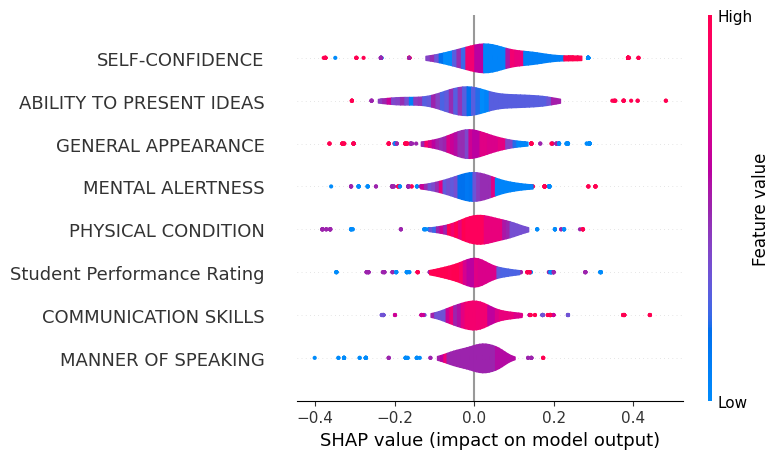

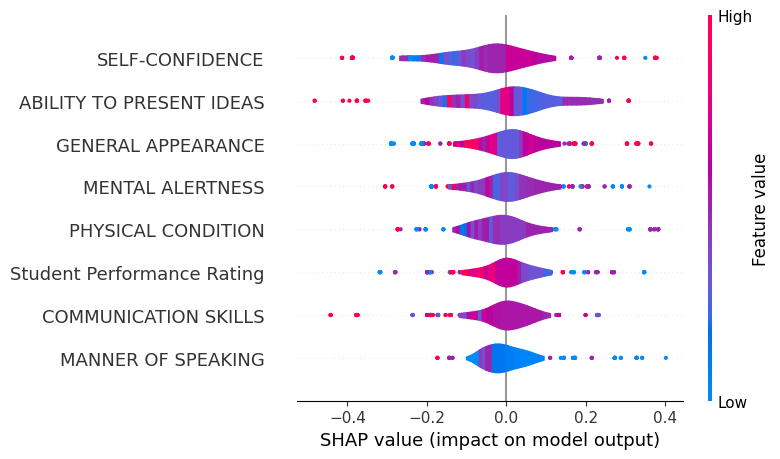

In [ ]:
#Given that SHAP values of the library are given one for each class, 2 violin graphs are performed.
shap_values_DT = explainer_DT.shap_values(X_test)
shap_values_class0 = shap_values_DT[:, :, 0]
shap_values_class1 = shap_values_DT[:, :, 1]

shap.summary_plot(shap_values_class0, X_test, feature_names=X.columns,plot_type='violin', class_names=['0', '1'], show_values_in_legend= True)
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns,plot_type='violin', class_names=['0', '1'], show_values_in_legend= True)

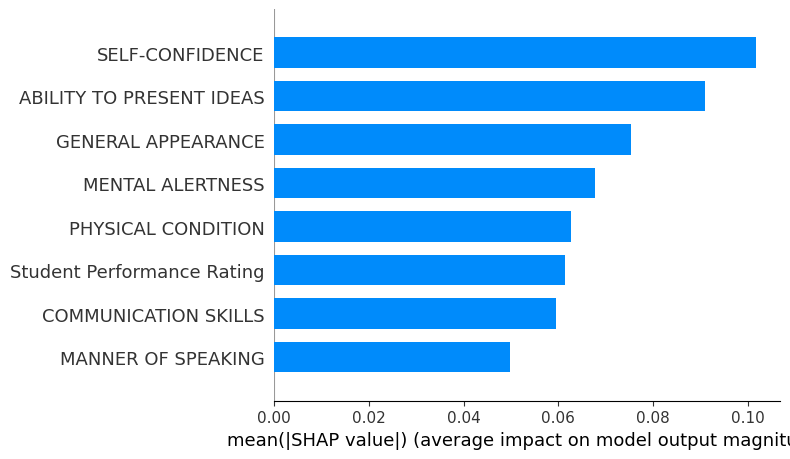

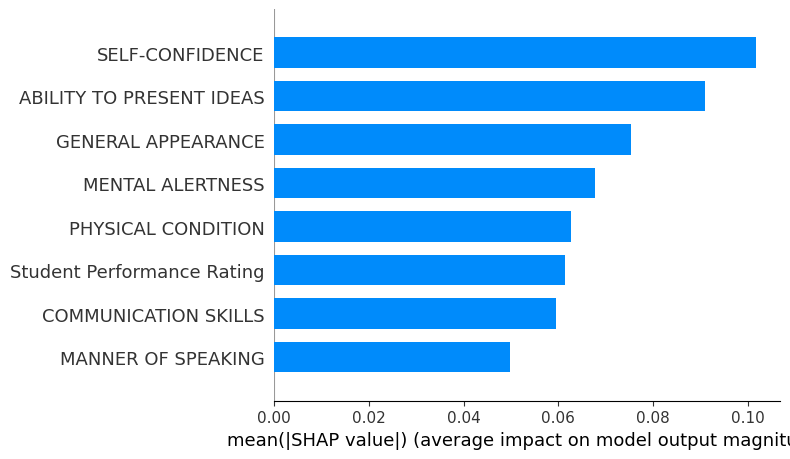

In [ ]:
shap.summary_plot(shap_values_class0, X_test, feature_names=X.columns,plot_type='bar', class_names=['0', '1'], show_values_in_legend= True)
shap.summary_plot(shap_values_class1, X_test, feature_names=X.columns,plot_type='bar', class_names=['0', '1'], show_values_in_legend= True)

#SHAP for LSTM

In [ ]:
explainer_LSTM = shap.DeepExplainer(model_LSTM, X_test[:100])
shap_values_LSTM = explainer_LSTM.shap_values(X_test[:100])

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



KeyError: 0

In [ ]:
#https://github.com/shap/shap/pull/1483

import tensorflow as tf
import shap
tf.compat.v1.disable_v2_behavior()

input_shape = X.shape[1:]
def build_model(n_hidden=2, n_neurons=50, dropout=0.2, learning_rate=3e-2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(dropout))
        model.add(tf.keras.layers.Activation("elu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=['AUC'], optimizer=optimizer)
    return model

nn = build_model()

explainer = shap.DeepExplainer(nn, X_test.sample(n=1000))
shap_values = explainer.shap_values(X_test.sample(n=1000).values)
shap.summary_plot(shap_values, X_valid.sample(n=1000))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



ValueError: Cannot take a larger sample than population when 'replace=False'